In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
random = np.random.RandomState(3)

In [3]:
X = np.linspace(0, 10, 100)

# Закон природы устанавливающий связь между X и y
y = 2 * X + 5

# Ошибки измерений, и прочие эффекты, сумма которых моделируется белым шумом (см. ЗБЧ)
Y = y + random.normal(0, 7, 100)

# Отложенная выборка
X_val = np.linspace(10, 20, 100)
Y_val = 2 * X_val + 5 + random.normal(0, 7, 100)

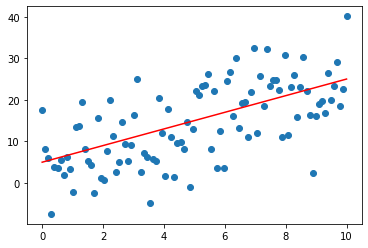

In [4]:
plt.scatter(X, Y)
plt.plot(X, y, c='r', label='True law');

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [6]:
models = []
for train, test in KFold(5).split(X, Y):
    X_train, X_test, y_train, y_test = X[train], X[test], Y[train], Y[test]
    lr = LinearRegression(fit_intercept=True)
    lr.fit(X_train.reshape(-1, 1), y_train)
    models.append(lr)
    
    y_pred = lr.predict(X_test.reshape(-1, 1))
    print(mean_squared_error(y_test, y_pred))

48.388425824025504
53.01944640514968
68.69459361806707
69.05342451713994
64.47085008185216


In [7]:
models

[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression()]

In [8]:
def plot_lr(X, model, ls='-'):
    k, b = model.coef_, model.intercept_
    y = k * X + b
    plt.plot(X, y, ls=ls, alpha=0.5)

# Обрати внимание насколько больше разброс в области `X_val`

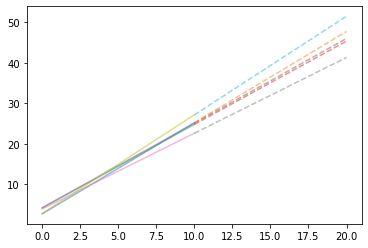

In [9]:
for model in models:
    plot_lr(X, model)
    plot_lr(X_val, model, '--')

In [10]:
k = []
b = []
for model in models:
    k.append(model.coef_)
    b.append(model.intercept_)

In [11]:
k_avg = np.mean(k)
b_avg = np.mean(b)

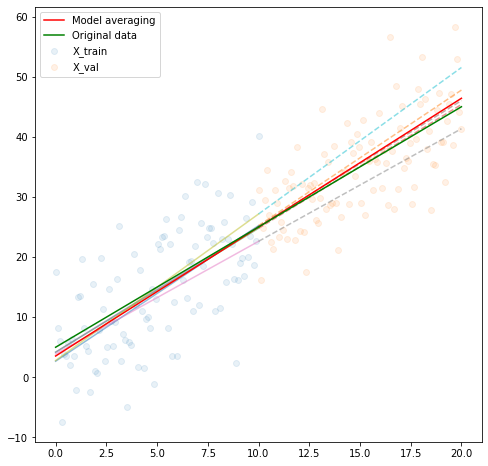

In [12]:
plt.figure(figsize=(8,8))
for model in models:
    plot_lr(X, model)
    plot_lr(X_val, model, '--')

plt.scatter(X, Y, alpha=0.1, label='X_train')
plt.scatter(X_val, Y_val, alpha=0.1, label='X_val')

y_avg_pred = k_avg * X + b_avg
y_avg_pred_val = k_avg * X_val + b_avg

plt.plot(X, y_avg_pred, c='r')
plt.plot(X_val, y_avg_pred_val, c='r', label = 'Model averaging')


plt.plot(X, 2*X+5, c='g')
plt.plot(X_val, 2*X_val+5, c='g', label = 'Original data')

plt.legend();

### Параметры ближе к истинным

In [13]:
print('Закон из которого генерили: k = 2, b = 5')

for i, model in enumerate(models):
    print(f'fold {i}: k = {np.round(model.coef_[0],3)}, b = {np.round(model.intercept_,3)}')
    
print(f'Усредненная модель: k = {np.round(k_avg, 3)}, b = {np.round(b_avg, 3)}')

Закон из которого генерили: k = 2, b = 5
fold 0: k = 2.255, b = 2.676
fold 1: k = 2.06, b = 4.182
fold 2: k = 2.093, b = 4.171
fold 3: k = 1.873, b = 3.882
fold 4: k = 2.437, b = 2.791
Усредненная модель: k = 2.143, b = 3.541


### MSE на отложенной выборке ниже (лучше)

In [14]:
for model in models:
    y_pred_val = model.predict(X_val.reshape(-1, 1))
    print(mean_squared_error(Y_val, y_pred_val))
    
y_avg_pred_val = k_avg * X_val + b_avg
mean_squared_error(Y_val, y_avg_pred_val)

41.87754685874363
38.10823620799811
38.74545665461962
45.58439241709921
61.19313172704408


39.15920668425122